In [19]:
import numpy as np
import matplotlib.pyplot as plt
X = 2*np.random.rand(100,1)
y = 4+3*X +np.random.rand(100,1)

In [6]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [17]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones(X_new.shape[0]), X_new]
y_predict = X_new_b.dot(theta_best)

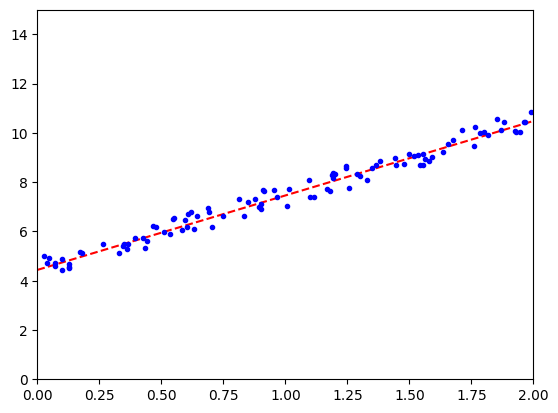

In [22]:
plt.plot(X_new, y_predict,"r--")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [24]:
#sklearn
from sklearn.linear_model import LinearRegression
lin_reg =LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 4.49180442],
       [10.50267941]])

In [25]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)

In [31]:
np.linalg.pinv(X_b).dot(y)

array([[6.89226011],
       [0.62954118]])

In [33]:
m=100
X = 6*np.random.rand(m,1)-3
y=0.5*X**2 + X +2 + np.random.randn(m,1)

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

lin_reg.intercept_, lin_reg.coef_

(array([1.83846521]), array([[0.96870886, 0.48484923]]))

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth =2, label  = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth =3, label  = "val")

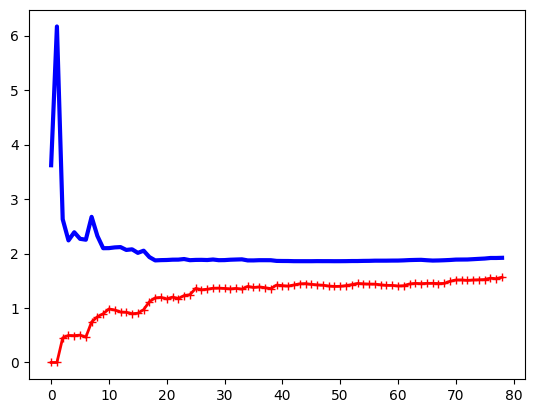

In [45]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

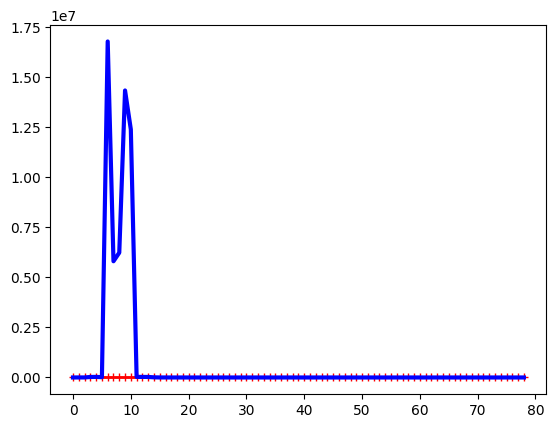

In [46]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X,y)